In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


#Metrics to evaluate models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

#Confusion matrix graphs
from sklearn.metrics import ConfusionMatrixDisplay

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Tools for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Cluster analysis
from sklearn.cluster import KMeans

In [2]:
#Download Mnist dataset via fetch_openml from sklearn
mnist = fetch_openml('mnist_784', data_home='datasets/mnist')

In [3]:
#Check dataset
mnist.data.shape

(70000, 784)

In [4]:
#Create array with labels and features
Z = np.c_[mnist.target, mnist.data.astype(int)]
#Sorted array
Z_sorted = sorted(Z, key=lambda z: z[0])


Z_sorted

[array(['0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 159, 253,
        159, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 48, 238, 252, 252, 252, 237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 227, 253, 252, 239, 233, 252,
        57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 60,
        224, 252, 253, 252, 202, 84, 252, 253, 122, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 252, 252, 252, 253, 252, 252, 96,
        189, 253, 167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51,
        238, 253, 253, 190, 

In [5]:
#Create X and Y from data and labels
X = Z[:,1:]
Y = Z[:,0]
#Ensure shuffling of array is the same every time
shuffle_index = np.random.RandomState(seed=19).permutation(70000)
#Shuffle X and Y
X, Y = X[shuffle_index], Y[shuffle_index]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [6]:
Y

array(['6', '7', '4', ..., '0', '0', '5'], dtype=object)

1


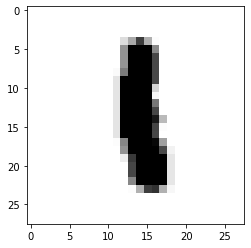

In [7]:
some_digit_index = 1997
X = X.astype(int)
print(Y[some_digit_index])
img = plt.imshow(X[some_digit_index].reshape(28, 28), cmap='gray_r')

In [8]:
#Training set
X_train = X[0:50000]
Y_train = Y[0:50000]

#Validation set
X_val = X[50000:60000]
Y_val = Y[50000:60000]

#Test set
X_test = X[60000:70000]
Y_test = Y[60000:70000]

In [9]:
#Training set has 50000 images of digits and 784 features
X_train.shape

(50000, 784)

In [10]:
#Training random forest classifier
rdf = RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=19)
t0 = time.time()
rdf.fit(X_train, Y_train)
t1 = time.time()
pred_train = rdf.predict(X_train[0:10000])
t2 = time.time()


print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 8.737
Prediction time for train: 0.137
Youdens index for train: 1.000


In [11]:
t3 = time.time()
pred_val = rdf.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.137
Youdens index for validation: 0.933


In [12]:
t5 = time.time()
pred_test = rdf.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.120
Youdens index for test: 0.927


In [13]:
#Random forest confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 967,    0,    4,    1,    0,    3,    3,    0,    4,    1],
       [   0, 1098,    5,    1,    2,    1,    2,    2,    3,    4],
       [   6,    0,  967,    3,    7,    0,    1,    6,    7,    1],
       [   0,    1,   16,  928,    0,   14,    1,   15,   12,    2],
       [   0,    1,    3,    0,  959,    0,    5,    2,    3,   14],
       [   5,    0,    0,   13,    4,  874,    8,    1,    8,    1],
       [   1,    2,    1,    0,    3,    8,  984,    0,    2,    0],
       [   1,    1,   11,    0,    5,    1,    0, 1022,    5,   12],
       [   3,    4,    2,    8,    7,    5,    5,    4,  916,   11],
       [   3,    2,    0,   14,   17,    5,    0,   13,    7,  926]])

In [14]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8998,   19],
        [  16,  967]],

       [[8871,   11],
        [  20, 1098]],

       [[8960,   42],
        [  31,  967]],

       [[8971,   40],
        [  61,  928]],

       [[8968,   45],
        [  28,  959]],

       [[9049,   37],
        [  40,  874]],

       [[8974,   25],
        [  17,  984]],

       [[8899,   43],
        [  36, 1022]],

       [[8984,   51],
        [  49,  916]],

       [[8967,   46],
        [  61,  926]]])

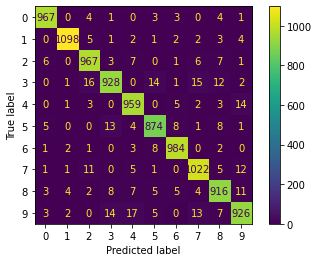

In [15]:
#Create graph of Random forest confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rdf.classes_)

disp.plot()

plt.show()

In [16]:
#Training naive bayes classifier

nb = GaussianNB()
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.809
Prediction time for train: 0.547
Youdens index for train: 0.093


In [17]:
nb = GaussianNB(var_smoothing=0.086)
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.929
Prediction time for train: 0.561
Youdens index for train: 0.595


In [18]:
t3 = time.time()
pred_val = nb.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.560
Youdens index for validation: 0.593


In [19]:
t5 = time.time()
pred_test = nb.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.614
Youdens index for test: 0.603


In [20]:
#Naive bayes confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 874,    1,    5,    1,    0,   17,   30,    0,   45,   10],
       [   0, 1088,    3,    0,    0,    1,    7,    0,   13,    6],
       [  17,   38,  756,   19,   16,    3,   80,    4,   61,    4],
       [   8,   51,   37,  761,    3,   17,    9,   14,   44,   45],
       [   2,   16,    5,    0,  626,    1,   20,    4,   34,  279],
       [  20,   21,    7,  115,   19,  582,   32,    9,   58,   51],
       [   6,   26,    2,    0,    7,   18,  927,    0,   14,    1],
       [   6,   29,    4,    6,   16,    0,    1,  869,   15,  112],
       [   8,  100,    7,   33,   13,   17,    9,    5,  711,   62],
       [   5,   21,    1,    8,   48,    3,    1,   18,   24,  858]])

In [21]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8945,   72],
        [ 109,  874]],

       [[8579,  303],
        [  30, 1088]],

       [[8931,   71],
        [ 242,  756]],

       [[8829,  182],
        [ 228,  761]],

       [[8891,  122],
        [ 361,  626]],

       [[9009,   77],
        [ 332,  582]],

       [[8810,  189],
        [  74,  927]],

       [[8888,   54],
        [ 189,  869]],

       [[8727,  308],
        [ 254,  711]],

       [[8443,  570],
        [ 129,  858]]])

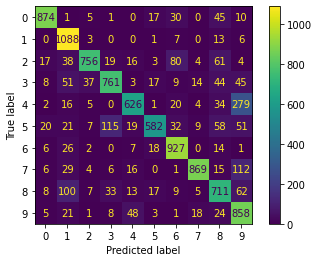

In [22]:
#Create graph of Naive bayes confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()

plt.show()

In [23]:
#Training KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')
t0 = time.time()
knc.fit(X_train, Y_train)
t1 = time.time()
pred_train = knc.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.055
Prediction time for train: 19.380
Youdens index for train: 0.962


In [24]:
t3 = time.time()
pred_val = knc.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 15.676
Youdens index for validation: 0.942


In [25]:
t5 = time.time()
pred_test = knc.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 23.798
Youdens index for test: 0.944


In [26]:
#KNeighborsClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 974,    0,    0,    0,    0,    1,    5,    1,    1,    1],
       [   0, 1112,    3,    0,    0,    0,    0,    2,    0,    1],
       [   9,    6,  966,    1,    1,    0,    0,   12,    2,    1],
       [   1,    3,    6,  958,    0,    5,    0,   10,    2,    4],
       [   0,   11,    1,    1,  953,    0,    0,    0,    0,   21],
       [   6,    0,    0,   11,    2,  883,    6,    2,    2,    2],
       [   2,    2,    0,    0,    2,    2,  993,    0,    0,    0],
       [   0,   10,    2,    0,    2,    0,    0, 1030,    2,   12],
       [   3,    9,    1,   16,    3,   12,    4,    3,  905,    9],
       [   2,    1,    0,    8,    9,    3,    0,   14,    0,  950]])

In [27]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8994,   23],
        [   9,  974]],

       [[8840,   42],
        [   6, 1112]],

       [[8989,   13],
        [  32,  966]],

       [[8974,   37],
        [  31,  958]],

       [[8994,   19],
        [  34,  953]],

       [[9063,   23],
        [  31,  883]],

       [[8984,   15],
        [   8,  993]],

       [[8898,   44],
        [  28, 1030]],

       [[9026,    9],
        [  60,  905]],

       [[8962,   51],
        [  37,  950]]])

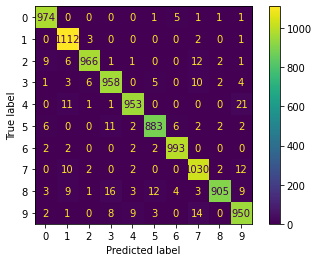

In [28]:
#Create graph of KNeighborsClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)

disp.plot()

plt.show()

In [134]:
#Training MLPClassifier hidden_layer_sizes=(75, 50, 25)

mlp = MLPClassifier(hidden_layer_sizes=(75, 50, 25), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 50.970
Prediction time for train: 0.089
Youdens index for train: 0.990


In [135]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.217
Youdens index for validation: 0.927


In [136]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.238
Youdens index for test: 0.927


In [137]:
#MLPClassifier hidden_layer_sizes=(75, 50, 25) confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 968,    0,    3,    0,    0,    1,    8,    0,    2,    1],
       [   0, 1103,    6,    1,    1,    0,    2,    0,    3,    2],
       [   8,    0,  964,    5,    5,    0,    3,    4,    8,    1],
       [   1,    0,   22,  932,    0,    9,    0,   11,   10,    4],
       [   2,    4,    0,    0,  958,    0,    2,    1,    0,   20],
       [   4,    1,    4,    9,    4,  871,    8,    1,    8,    4],
       [   2,    0,    2,    0,   10,    5,  978,    0,    4,    0],
       [   1,    0,    8,    3,    4,    0,    0, 1025,    2,   15],
       [   6,    4,   17,   11,    7,    2,    1,    1,  913,    3],
       [   3,    1,    0,    8,   22,    3,    0,   17,    3,  930]])

In [138]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8990,   27],
        [  15,  968]],

       [[8872,   10],
        [  15, 1103]],

       [[8940,   62],
        [  34,  964]],

       [[8974,   37],
        [  57,  932]],

       [[8960,   53],
        [  29,  958]],

       [[9066,   20],
        [  43,  871]],

       [[8975,   24],
        [  23,  978]],

       [[8907,   35],
        [  33, 1025]],

       [[8995,   40],
        [  52,  913]],

       [[8963,   50],
        [  57,  930]]])

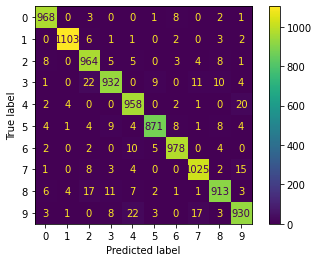

In [139]:
#Create graph of MLPClassifier hidden_layer_sizes=(75, 50, 25) confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()

In [140]:
#Training MLPClassifier hidden_layer_sizes=(75, 50)

mlp = MLPClassifier(hidden_layer_sizes=(75, 50), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 57.037
Prediction time for train: 0.083
Youdens index for train: 0.989


In [141]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.231
Youdens index for validation: 0.923


In [142]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.135
Youdens index for test: 0.921


In [143]:
#MLPClassifier hidden_layer_sizes=(75, 50) confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 961,    0,    4,    2,    2,    2,    5,    0,    1,    6],
       [   0, 1092,    5,    1,    0,    5,    2,    1,    8,    4],
       [   3,    2,  957,    7,    4,    1,    2,   12,    9,    1],
       [   2,    1,    9,  924,    1,   23,    1,    9,   10,    9],
       [   1,    2,    2,    1,  944,    3,    2,    3,    0,   29],
       [   5,    2,    3,    4,    1,  881,    7,    1,    6,    4],
       [   5,    1,    1,    0,    5,    5,  977,    2,    4,    1],
       [   1,    0,    5,    2,    7,    2,    0, 1020,    2,   19],
       [   1,    3,    4,    9,    2,   15,    3,    6,  904,   18],
       [   0,    0,    0,    4,   11,    9,    0,   10,    3,  950]])

In [144]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8999,   18],
        [  22,  961]],

       [[8871,   11],
        [  26, 1092]],

       [[8969,   33],
        [  41,  957]],

       [[8981,   30],
        [  65,  924]],

       [[8980,   33],
        [  43,  944]],

       [[9021,   65],
        [  33,  881]],

       [[8977,   22],
        [  24,  977]],

       [[8898,   44],
        [  38, 1020]],

       [[8992,   43],
        [  61,  904]],

       [[8922,   91],
        [  37,  950]]])

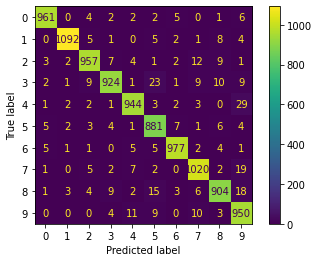

In [145]:
#Create graph of MLPClassifier hidden_layer_sizes=(75, 75) confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()

In [260]:
#Cluster analysis

t0 = time.time()
kmeans = KMeans(n_clusters=10, n_init=10, random_state=19, max_iter=300, algorithm='auto').fit(X_train, Y_train)
t1 = time.time()
pred_train = kmeans.predict(X_train[0:10000])
t2 = time.time()
pred_train = pred_train.astype(str)

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')


Training time: 40.705
Prediction time for train: 0.078
Youdens index for train: -0.713


In [261]:
t3 = time.time()
pred_val = kmeans.predict(X_val)
t4 = time.time()

pred_val = pred_val.astype(str)

print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.062
Youdens index for validation: -0.726


In [262]:
t5 = time.time()
pred_test = kmeans.predict(X_test)
t6 = time.time()

pred_test = pred_test.astype(str)

print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.062
Youdens index for test: -0.717


In [263]:
#Cluster analysis confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 48,   5, 103,   4,  12,   0, 760,  42,   5,   4],
       [  1, 492,   1,   0,   0, 617,   0,   4,   3,   0],
       [ 57,  58,  16, 707,  41,  54,  11,  40,   8,   6],
       [616,  17, 200,  39,   9,  64,   5,  10,   6,  23],
       [  0,  43,   2,   1, 375,  16,   0,  27, 249, 274],
       [296, 110, 301,   3,  28,  26,  10,  28,  64,  48],
       [  2,  30,  20,  10, 104,  41,   8, 786,   0,   0],
       [  0,  29,   1,   8,  81,  35,   0,   0, 485, 419],
       [221,  57, 534,   5,  19,  50,   7,   7,  34,  31],
       [ 16,   9,  11,   0, 204,  27,   5,   2, 299, 414]])

In [264]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[7808, 1209],
        [ 935,   48]],

       [[8524,  358],
        [ 626,  492]],

       [[7829, 1173],
        [ 982,   16]],

       [[8273,  738],
        [ 950,   39]],

       [[8515,  498],
        [ 612,  375]],

       [[8182,  904],
        [ 888,   26]],

       [[8201,  798],
        [ 993,    8]],

       [[7996,  946],
        [1058,    0]],

       [[7916, 1119],
        [ 931,   34]],

       [[8208,  805],
        [ 573,  414]]])

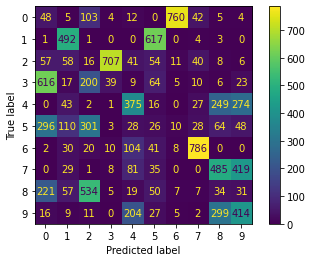

In [267]:
#Create graph of MLPClassifier hidden_layer_sizes=(75, 75) confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [178]:
#Prepare data for Principal component analysis

scaler = StandardScaler()

scaler.fit(X_train)

#Standardize train, val and test set
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [181]:
X_train[30000]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.83977140e-03, -6.30410991e-03, -4.47218068e-03, -4.47218068e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.29758889e-03, -9.12048405e-03, -1.23219199e-02,
       -1.66672826e-02, -2.11992688e-02, -2.47321873e-02, -2.96322779e-02,
       -3.20377898e-02, -3.25333942e-02, -3.52804833e-02, -3.22301660e-02,
       -2.92673636e-02, -2.58725604e-02, -2.10494713e-02, -1.81656897e-02,
       -1.60250518e-02, -9.80577533e-03, -7.61265508e-03, -4.79881857e-03,
        0.00000000e+00,  

In [182]:
pca = PCA(.95)

pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [183]:
X_train[30000]

array([-1.17652676e+00, -2.91882918e+00, -5.86255886e+00, -6.29514941e+00,
       -1.33230702e+00,  5.06334359e+00, -4.79654365e+00,  3.34138538e+00,
       -2.07886477e+00,  2.77894626e+00, -7.10281135e+00,  4.20124064e+00,
        4.82642160e+00,  4.73933784e+00, -2.20994168e+00, -9.32995022e-01,
        3.76016208e+00, -4.08395376e+00,  4.36717868e+00,  3.35742921e+00,
        1.18356389e+00, -1.65859407e+00, -5.67231519e+00, -1.84240525e+00,
       -3.82119837e+00, -9.22646592e-01,  3.40417903e+00, -2.63054016e+00,
       -1.36811602e+00,  3.01599750e+00, -2.40828009e+00,  5.42084953e+00,
       -2.83695886e-01, -5.08245297e-01,  2.07432621e+00,  3.51503244e+00,
       -1.84580715e+00, -2.03561335e+00,  2.57752864e+00, -7.92538642e-02,
       -7.72439103e-01, -6.17169394e-01, -1.70230532e+00, -4.54784456e-01,
        1.03212890e+00, -8.50657186e-01, -1.66415179e+00, -1.67563840e+00,
       -4.79847815e-01, -9.01788934e-01,  4.53690834e-01, -2.19440493e+00,
       -1.59634311e+00,  

In [184]:
X_train.shape

(50000, 328)

In [185]:
#Training PCA applied random forest classifier
rdf = RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=19)
t0 = time.time()
rdf.fit(X_train, Y_train)
t1 = time.time()
pred_train = rdf.predict(X_train[0:10000])
t2 = time.time()


print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 28.071
Prediction time for train: 0.107
Youdens index for train: 1.000


In [186]:
t3 = time.time()
pred_val = rdf.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.119
Youdens index for validation: 0.862


In [187]:
t5 = time.time()
pred_test = rdf.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.134
Youdens index for test: 0.851


In [188]:
#PCA applied Random forest confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 955,    0,    3,    3,    2,    8,    9,    0,    3,    0],
       [   0, 1084,    8,    3,    3,    0,    9,    2,    6,    3],
       [   9,    1,  933,   17,   12,    0,    7,    4,   13,    2],
       [   3,    2,   22,  900,    3,   18,    2,   15,   18,    6],
       [   1,    2,    7,    1,  927,    2,    6,    9,    7,   25],
       [  11,    1,    9,   48,    5,  805,   16,    4,   11,    4],
       [   7,    1,    3,    2,    6,   11,  967,    0,    4,    0],
       [   5,    6,   13,    7,   11,    1,    0,  981,    1,   33],
       [   7,    4,   18,   33,    9,   26,    6,    4,  851,    7],
       [   4,    1,    4,   16,   45,    7,    0,   37,    9,  864]])

In [189]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8970,   47],
        [  28,  955]],

       [[8864,   18],
        [  34, 1084]],

       [[8915,   87],
        [  65,  933]],

       [[8881,  130],
        [  89,  900]],

       [[8917,   96],
        [  60,  927]],

       [[9013,   73],
        [ 109,  805]],

       [[8944,   55],
        [  34,  967]],

       [[8867,   75],
        [  77,  981]],

       [[8963,   72],
        [ 114,  851]],

       [[8933,   80],
        [ 123,  864]]])

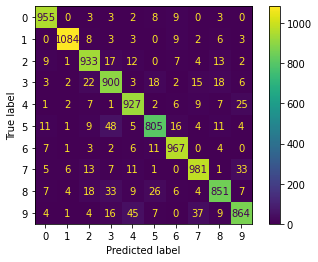

In [190]:
#Create graph of PCA applied Random forest confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rdf.classes_)

disp.plot()

plt.show()

In [197]:
#Training PCA applied naive bayes classifier

nb = GaussianNB()
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.368
Prediction time for train: 0.251
Youdens index for train: -0.123


In [198]:
#Training PCA applied naive bayes classifier

nb = GaussianNB(var_smoothing=0.086)
t0 = time.time()
nb.fit(X_train, Y_train)
t1 = time.time()
pred_train = nb.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.342
Prediction time for train: 0.233
Youdens index for train: -0.285


In [199]:
t3 = time.time()
pred_val = nb.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.335
Youdens index for validation: -0.286


In [200]:
t5 = time.time()
pred_test = nb.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.351
Youdens index for test: -0.283


In [201]:
#PCA applied Naive bayes confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 920,   50,    3,    1,    5,    0,    2,    0,    2,    0],
       [   2, 1110,    1,    0,    2,    0,    1,    0,    2,    0],
       [ 141,  311,  106,    9,  277,    1,    5,    2,  145,    1],
       [ 212,  441,   24,   83,   31,    0,    1,    4,  187,    6],
       [   1,  318,    6,    1,  652,    2,    1,    4,    0,    2],
       [ 191,  376,    4,    2,  107,   76,    5,    0,  146,    7],
       [ 294,  325,   11,    0,  276,    3,   91,    0,    1,    0],
       [ 130,  432,    0,    2,  243,    0,    0,  128,    4,  119],
       [  34,  498,    7,    1,   33,    3,    4,    0,  383,    2],
       [  18,  413,    8,    0,  413,    0,    0,   14,   11,  110]])

In [202]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[7994, 1023],
        [  63,  920]],

       [[5718, 3164],
        [   8, 1110]],

       [[8938,   64],
        [ 892,  106]],

       [[8995,   16],
        [ 906,   83]],

       [[7626, 1387],
        [ 335,  652]],

       [[9077,    9],
        [ 838,   76]],

       [[8980,   19],
        [ 910,   91]],

       [[8918,   24],
        [ 930,  128]],

       [[8537,  498],
        [ 582,  383]],

       [[8876,  137],
        [ 877,  110]]])

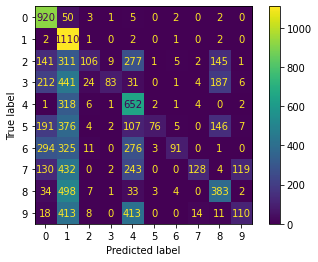

In [203]:
#Create graph of PCA applied Naive bayes confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot()

plt.show()

In [204]:
#Training PCA applied KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute')
t0 = time.time()
knc.fit(X_train, Y_train)
t1 = time.time()
pred_train = knc.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 0.076
Prediction time for train: 11.866
Youdens index for train: 0.929


In [205]:
t3 = time.time()
pred_val = knc.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 11.935
Youdens index for validation: 0.898


In [206]:
t5 = time.time()
pred_test = knc.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 12.283
Youdens index for test: 0.898


In [207]:
#PCA applied KNeighborsClassifier confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 968,    0,    0,    0,    2,    5,    6,    0,    1,    1],
       [   0, 1108,    4,    0,    0,    0,    1,    2,    1,    2],
       [  12,    7,  946,   11,    3,    1,    7,    4,    6,    1],
       [   1,    2,    7,  934,    0,   16,    0,   14,    9,    6],
       [   1,   15,    8,    0,  923,    2,    2,    4,    1,   31],
       [   7,    3,    5,   22,    4,  847,   17,    3,    3,    3],
       [   3,    3,    2,    2,    4,    8,  978,    0,    1,    0],
       [   2,   10,    3,    4,    6,    2,    0,  998,    0,   33],
       [   7,   10,    6,   27,    7,   21,    5,    5,  871,    6],
       [   2,    1,    2,   10,   14,    2,    0,   31,    2,  923]])

In [208]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8982,   35],
        [  15,  968]],

       [[8831,   51],
        [  10, 1108]],

       [[8965,   37],
        [  52,  946]],

       [[8935,   76],
        [  55,  934]],

       [[8973,   40],
        [  64,  923]],

       [[9029,   57],
        [  67,  847]],

       [[8961,   38],
        [  23,  978]],

       [[8879,   63],
        [  60,  998]],

       [[9011,   24],
        [  94,  871]],

       [[8930,   83],
        [  64,  923]]])

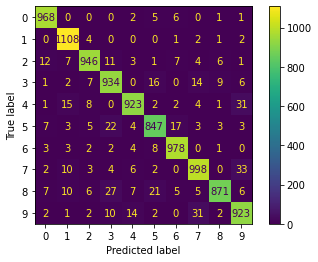

In [209]:
#Create graph of PCA applied KNeighborsClassifier confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)

disp.plot()

plt.show()

In [210]:
#Training PCA applied MLPClassifier hidden_layer_sizes=(75, 50, 25)

mlp = MLPClassifier(hidden_layer_sizes=(75, 50, 25), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 26.520
Prediction time for train: 0.052
Youdens index for train: 0.999


In [211]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.037
Youdens index for validation: 0.932


In [212]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.036
Youdens index for test: 0.931


In [213]:
#PCA applied MLPClassifier hidden_layer_sizes=(75, 50, 25) confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 960,    0,    4,    1,    1,    3,    4,    2,    5,    3],
       [   0, 1099,    5,    1,    1,    1,    3,    3,    5,    0],
       [   3,    2,  956,    9,    4,    2,    4,    7,    7,    4],
       [   0,    2,   14,  938,    0,   12,    0,    6,   12,    5],
       [   1,    1,    3,    0,  955,    0,    3,    4,    3,   17],
       [   4,    2,    3,    6,    1,  869,    4,    3,   15,    7],
       [   3,    1,    5,    1,    3,    3,  982,    0,    3,    0],
       [   1,    1,    5,    4,    4,    0,    0, 1028,    1,   14],
       [   4,    3,    2,    6,    3,   11,    2,    3,  921,   10],
       [   0,    0,    1,    4,   10,    5,    0,   14,    1,  952]])

In [214]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[9001,   16],
        [  23,  960]],

       [[8870,   12],
        [  19, 1099]],

       [[8960,   42],
        [  42,  956]],

       [[8979,   32],
        [  51,  938]],

       [[8986,   27],
        [  32,  955]],

       [[9049,   37],
        [  45,  869]],

       [[8979,   20],
        [  19,  982]],

       [[8900,   42],
        [  30, 1028]],

       [[8983,   52],
        [  44,  921]],

       [[8953,   60],
        [  35,  952]]])

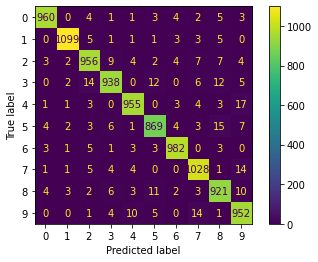

In [215]:
#Create graph of PCA applied MLPClassifier hidden_layer_sizes=(784, 784, 784) confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()

In [216]:
#Training PCA applied MLPClassifier hidden_layer_sizes=(75, 50)

mlp = MLPClassifier(hidden_layer_sizes=(75, 50), random_state=19)
t0 = time.time()
mlp.fit(X_train, Y_train)
t1 = time.time()
pred_train = mlp.predict(X_train[0:10000])
t2 = time.time()

print(f'Training time: {t1-t0:3.3f}')
print(f'Prediction time for train: {t2-t1:3.3f}')
print(f'Youdens index for train: {((metrics.balanced_accuracy_score(Y_train[0:10000], pred_train)*2)-1):.3f}')

Training time: 17.722
Prediction time for train: 0.031
Youdens index for train: 1.000


In [217]:
t3 = time.time()
pred_val = mlp.predict(X_val)
t4 = time.time()
print(f'Prediction time for validation: {t4-t3:3.3f}')
print(f'Youdens index for validation: {((metrics.balanced_accuracy_score(Y_val, pred_val)*2)-1):.3f}')

Prediction time for validation: 0.035
Youdens index for validation: 0.937


In [218]:
t5 = time.time()
pred_test = mlp.predict(X_test)
t6 = time.time()
print(f'Prediction time for test: {t6-t5:3.3f}')
print(f'Youdens index for test: {((metrics.balanced_accuracy_score(Y_test, pred_test)*2)-1):.3f}')

Prediction time for test: 0.034
Youdens index for test: 0.937


In [219]:
#PCA applied MLPClassifier hidden_layer_sizes=(75, 50) confusion matrix

cm = confusion_matrix(Y_test, pred_test)
cm

array([[ 966,    0,    3,    1,    3,    2,    4,    1,    2,    1],
       [   0, 1099,    4,    2,    3,    2,    1,    1,    4,    2],
       [   4,    3,  965,    6,    3,    1,    3,    6,    5,    2],
       [   3,    0,    7,  947,    1,   13,    1,    7,    8,    2],
       [   0,    2,    1,    0,  962,    1,    1,    2,    5,   13],
       [   5,    1,    2,    9,    0,  882,    4,    2,    5,    4],
       [   6,    1,    5,    0,    7,    6,  973,    0,    3,    0],
       [   2,    0,    6,    2,    3,    2,    0, 1030,    1,   12],
       [   4,    3,    7,    5,    5,    6,    4,    4,  924,    3],
       [   2,    0,    0,    6,   13,    6,    1,   13,    6,  940]])

In [220]:
multilabel_confusion_matrix(Y_test, pred_test)

array([[[8991,   26],
        [  17,  966]],

       [[8872,   10],
        [  19, 1099]],

       [[8967,   35],
        [  33,  965]],

       [[8980,   31],
        [  42,  947]],

       [[8975,   38],
        [  25,  962]],

       [[9047,   39],
        [  32,  882]],

       [[8980,   19],
        [  28,  973]],

       [[8906,   36],
        [  28, 1030]],

       [[8996,   39],
        [  41,  924]],

       [[8974,   39],
        [  47,  940]]])

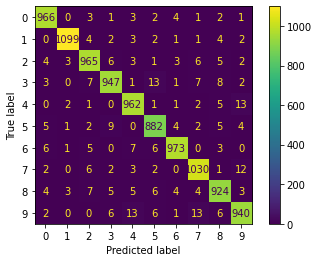

In [221]:
#Create graph of PCA applied MLPClassifier hidden_layer_sizes=(75, 75) confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()

plt.show()